## Плохая обусловленность матрицы Вандермонда

Построение интерполяционного многочлена путем решения системы с матрицей Вандермонда это плохой способ. Но именно он реализован во многих библиотечных функциях, например,  ```numpy.polyfit```.

In [1]:
import numpy as np
n = 100
x = np.linspace(0, 1, n)
A = np.vander(x, increasing = 'True')
print('cond_2(A) = {0:7.3e}'.format(np.linalg.cond(A)))
c = np.random.rand(n)
b = np.dot(A, c)
c_ = np.linalg.solve(A, b)
print('||c - c_|| = {0:7.3}'.
      format( np.linalg.norm(c - c_, ord = np.inf)))

cond_2(A) = 7.719e+19
||c - c_|| = 1.64e+02


In [2]:
#?np.polyfit

### Из-за неточно найденных коэффициентов многочлен не проходит через заданные точки

/home/simss/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


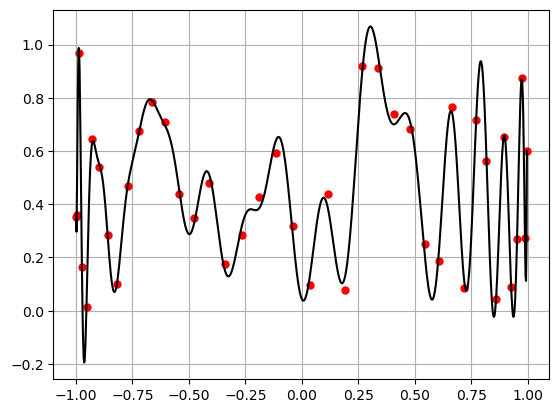

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

n = 40
# Задаём узлы
x = np.cos(np.pi * np.linspace(-1,0., n+1, 
                               endpoint=False))
x = np.sort(x)
# Случайные значения в узлах
y = np.random.rand(n+1)
#
p = np.polyfit(x, y, n)
xx = np.linspace(np.min(x),np.max(x), 1000)
yy = np.polyval(p, xx)
plt.plot(x,y,'ro', ms = 5)
plt.plot(xx, yy,'k-')
plt.grid(True)

## Графики базовых многочленов Лагранжа
Важно: между узлами многочлены могут принимать значения больше 1 по модулю.

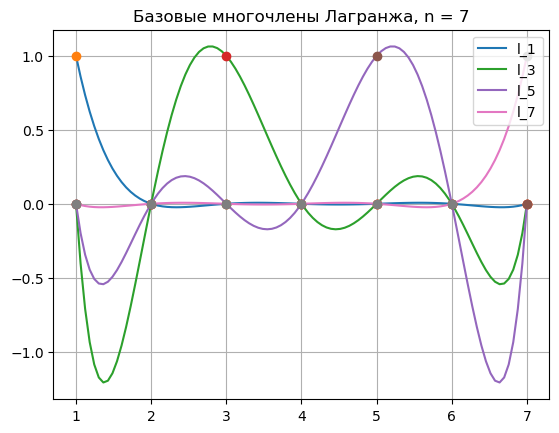

In [4]:
# Многочлены Лагранжа
%matplotlib inline
from scipy.interpolate \
import BarycentricInterpolator
import numpy as np
from matplotlib import pyplot as plt

n = 7
for j in range(0, n, 2):
    xi = np.arange(n) + 1
    yi = np.zeros(n)
    yi[j] = 1
    lagrange = BarycentricInterpolator(xi,yi)

    x = np.linspace(1,n,100)
    y = lagrange(x)

    plt.plot(x, y, label = 'l_'+str(j+1))
    plt.plot(xi, yi, 'o')
plt.legend(loc=1)
plt.title('Базовые многочлены Лагранжа, n = ' + str(n))
plt.grid(True)
plt.savefig('lagrange_polynomials.png', dpi = 600, bbox_inches='tight')

## Сетка из корней многочленов Чебышёва минимизирует оценку ошибки

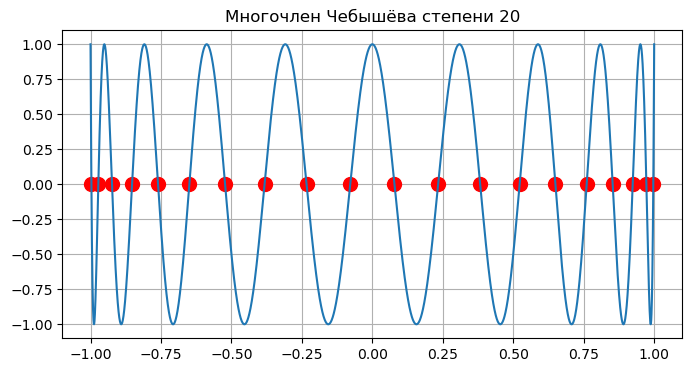

In [5]:
# Многочлены Чебышёва
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
n = 20
j = np.arange(n)
tn = np.cos(np.pi/(2*n) + np.pi * j / n)
xx = np.linspace(-1,1,4000)
fig, ax = plt.subplots(figsize = (8,4))
plt.plot(tn, np.zeros(n), 'ro', ms = 10)
plt.plot(xx, np.cos(n * np.arccos(xx)))
plt.grid(True)
plt.title('Многочлен Чебышёва степени ' + str(n))
plt.savefig('cheb_polynomial.png', dpi = 600, bbox_inches = 'tight')

## Сравнение интерполяции на равномерной сетке и чебышёвской сетке

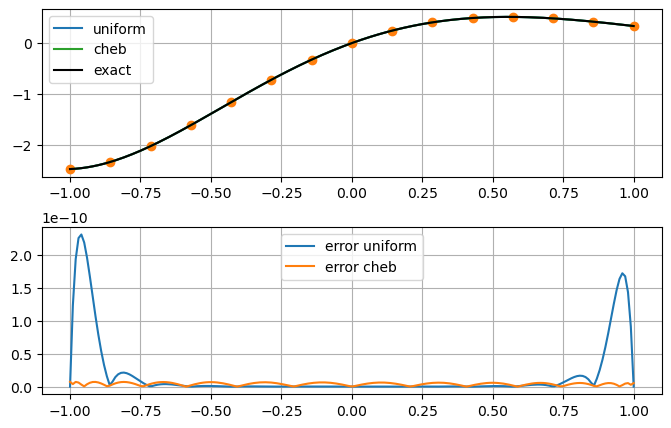

In [2]:
%matplotlib inline
from scipy.interpolate import BarycentricInterpolator
import numpy as np
from matplotlib import pyplot as plt

f = lambda x : np.sin(2 * x) * np.exp(-x)
# f = lambda x: 1/(25*x**2 + 1)
x = np.linspace(-1, 1, 200)
n = 15 # 5, 20
# uniform
xi = np.linspace(-1, 1, n)
yi = f(xi)
Ln = BarycentricInterpolator(xi,yi)
y = Ln(x)
# Chebyshev
j = np.arange(n)
xic = np.cos(np.pi/(2*n) + np.pi * j / n)
yic = f(xic)
Lnc = BarycentricInterpolator(xic, yic)
yc = Lnc(x)

#
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8,5) )
ax1.plot(x, y, label = 'uniform')
ax1.plot(xi, yi,'o')
ax1.plot(x, yc, label = 'cheb')
ax1.plot(x, f(x),'k-', label = 'exact')
ax1.legend()
ax1.grid(True)

ax2.plot(x, np.abs(f(x) - y), label = 'error uniform')
ax2.plot(x, np.abs(f(x) - yc), label = 'error cheb')
ax2.legend()
ax2.grid(True)
plt.subplots_adjust(hspace  = 0.3)

### Функция, на которой интерполяция на равномерной сетке расходится

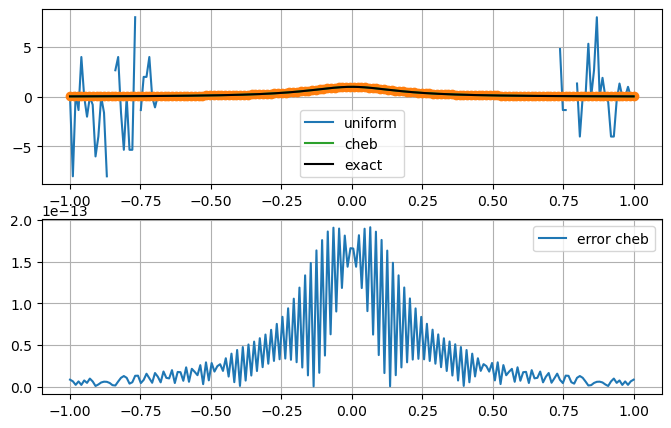

In [8]:
%matplotlib inline
from scipy.interpolate import BarycentricInterpolator
import numpy as np
from matplotlib import pyplot as plt


f = lambda x: 1/(25*x**2 + 1)
x = np.linspace(-1, 1, 200)
n =150 # 5,20
# uniform
xi = np.linspace(-1, 1, n)
yi = f(xi)
Ln = BarycentricInterpolator(xi,yi)
y = Ln(x)
# Chebyshev
j = np.arange(n)
xic = np.cos(np.pi/(2*n) + np.pi * j / n)
yic = f(xic)
Lnc = BarycentricInterpolator(xic, yic)
yc = Lnc(x)

#
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8,5) )
ax1.plot(x, y, label = 'uniform')
ax1.plot(xi, yi,'o')
ax1.plot(x, yc, label = 'cheb')
ax1.plot(x, f(x),'k-', label = 'exact')
ax1.legend()
ax1.grid(True)

#ax2.plot(x, np.abs(f(x) - y), label = 'error uniform')
ax2.plot(x, np.abs(f(x) - yc), label = 'error cheb')
ax2.legend()
ax2.grid(True)